Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/philosopher/'

N = 10_000
M = 500
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}8/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}8/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}8/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}8/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 09:15:25 2025 +0200) (509.28ms ela...,0.546,0.0000,0.326,0.87,0.26,14.77,52.21 C,Nominal
1,(Mon Mar 31 09:15:25 2025 +0200) (506.54ms ela...,0.482,0.0318,0.343,0.74,0.21,14.23,52.51 C,Nominal
2,(Mon Mar 31 09:15:26 2025 +0200) (506.43ms ela...,1.320,0.0000,0.306,1.58,0.33,22.34,52.51 C,Nominal
3,(Mon Mar 31 09:15:26 2025 +0200) (508.29ms ela...,0.387,0.0000,0.290,0.57,0.23,13.65,52.17 C,Nominal
4,(Mon Mar 31 09:15:27 2025 +0200) (508.00ms ela...,0.280,0.0000,0.291,0.49,0.16,11.32,52.17 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(101, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 09:15:36 2025 +0200) (1008.78ms el...,36.4,0.00000,1.250,38.15,3.92,98.74,53.02 C,Nominal
1,(Mon Mar 31 09:15:37 2025 +0200) (1004.55ms el...,36.0,0.00413,0.553,38.41,3.90,99.47,56.71 C,Nominal
2,(Mon Mar 31 09:15:38 2025 +0200) (1005.06ms el...,35.3,0.00000,0.535,37.62,3.81,97.86,59.40 C,Nominal
3,(Mon Mar 31 09:15:39 2025 +0200) (1004.76ms el...,36.2,0.00000,0.518,38.50,3.91,99.84,61.74 C,Nominal
4,(Mon Mar 31 09:15:40 2025 +0200) (1004.68ms el...,36.1,0.00000,0.533,38.40,3.89,99.35,63.73 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 09:34:23 2025 +0200) (506.81ms elap...,1.980,0.000,0.525,4.05,1.05,100.03,48.69 C,Nominal
1,(Tue Apr 1 09:34:23 2025 +0200) (506.74ms elap...,0.734,0.033,0.594,2.72,0.31,16.57,48.69 C,Nominal
2,(Tue Apr 1 09:34:24 2025 +0200) (508.23ms elap...,0.218,0.000,0.535,2.11,0.15,8.03,48.67 C,Nominal
3,(Tue Apr 1 09:34:24 2025 +0200) (508.21ms elap...,1.180,0.000,0.550,3.05,0.27,21.25,48.67 C,Nominal
4,(Tue Apr 1 09:34:25 2025 +0200) (507.20ms elap...,0.159,0.000,0.521,1.98,0.12,8.12,48.66 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(261, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 09:34:35 2025 +0200) (1007.31ms ela...,23.4,0.00000,1.11,25.72,3.21,96.33,50.79 C,Nominal
1,(Tue Apr 1 09:34:36 2025 +0200) (1004.19ms ela...,23.6,0.00322,1.21,25.93,3.20,96.24,53.96 C,Nominal
2,(Tue Apr 1 09:34:37 2025 +0200) (1003.91ms ela...,23.9,0.02950,1.23,26.26,3.23,96.31,56.52 C,Nominal
3,(Tue Apr 1 09:34:38 2025 +0200) (1004.51ms ela...,23.3,0.00000,1.13,25.60,3.18,96.14,60.28 C,Nominal
4,(Tue Apr 1 09:34:39 2025 +0200) (1004.38ms ela...,23.2,0.00000,1.14,25.59,3.17,96.14,61.70 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 09:15:25,0.546,0.0000,0.326,0.87,0.26,14.77,52.21,Nominal,509.28
1,2025-03-31 09:15:25,0.482,0.0318,0.343,0.74,0.21,14.23,52.51,Nominal,506.54
2,2025-03-31 09:15:26,1.320,0.0000,0.306,1.58,0.33,22.34,52.51,Nominal,506.43
3,2025-03-31 09:15:26,0.387,0.0000,0.290,0.57,0.23,13.65,52.17,Nominal,508.29
4,2025-03-31 09:15:27,0.280,0.0000,0.291,0.49,0.16,11.32,52.17,Nominal,508.00


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(101, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 09:15:36,36.4,0.00000,1.250,38.15,3.92,98.74,53.02,Nominal,1008.78
1,2025-03-31 09:15:37,36.0,0.00413,0.553,38.41,3.90,99.47,56.71,Nominal,1004.55
2,2025-03-31 09:15:38,35.3,0.00000,0.535,37.62,3.81,97.86,59.40,Nominal,1005.06
3,2025-03-31 09:15:39,36.2,0.00000,0.518,38.50,3.91,99.84,61.74,Nominal,1004.76
4,2025-03-31 09:15:40,36.1,0.00000,0.533,38.40,3.89,99.35,63.73,Nominal,1004.68


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 09:34:23,1.980,0.000,0.525,4.05,1.05,100.03,48.69,Nominal,506.81
1,2025-04-01 09:34:23,0.734,0.033,0.594,2.72,0.31,16.57,48.69,Nominal,506.74
2,2025-04-01 09:34:24,0.218,0.000,0.535,2.11,0.15,8.03,48.67,Nominal,508.23
3,2025-04-01 09:34:24,1.180,0.000,0.550,3.05,0.27,21.25,48.67,Nominal,508.21
4,2025-04-01 09:34:25,0.159,0.000,0.521,1.98,0.12,8.12,48.66,Nominal,507.20


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(261, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 09:34:35,23.4,0.00000,1.11,25.72,3.21,96.33,50.79,Nominal,1007.31
1,2025-04-01 09:34:36,23.6,0.00322,1.21,25.93,3.20,96.24,53.96,Nominal,1004.19
2,2025-04-01 09:34:37,23.9,0.02950,1.23,26.26,3.23,96.31,56.52,Nominal,1003.91
3,2025-04-01 09:34:38,23.3,0.00000,1.13,25.60,3.18,96.14,60.28,Nominal,1004.51
4,2025-04-01 09:34:39,23.2,0.00000,1.14,25.59,3.17,96.14,61.70,Nominal,1004.38


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


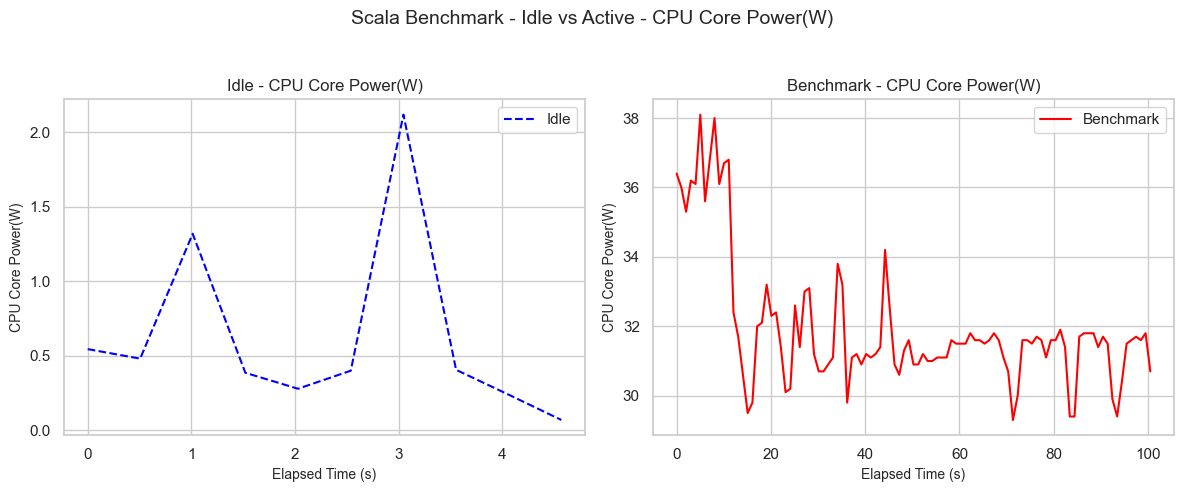

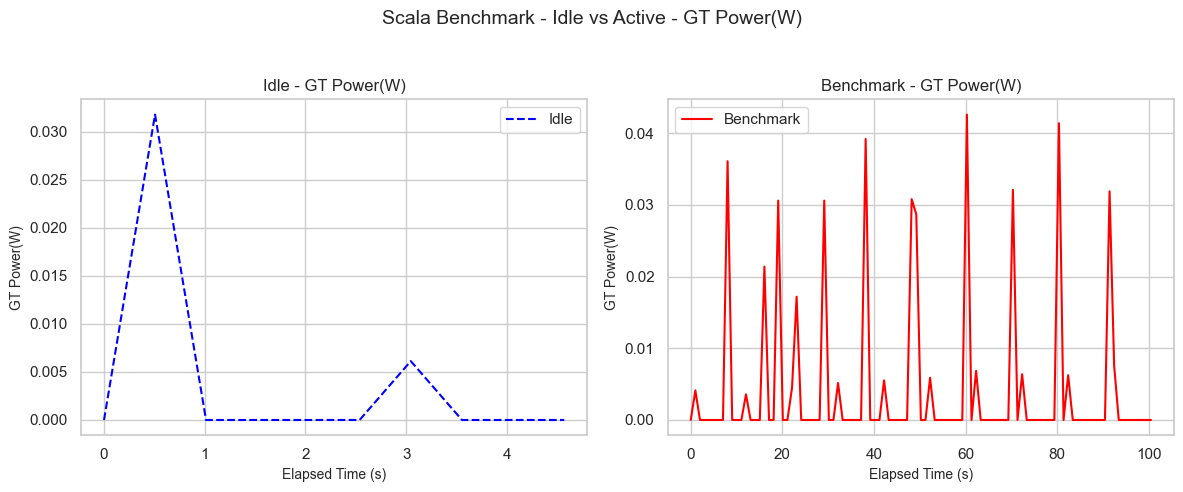

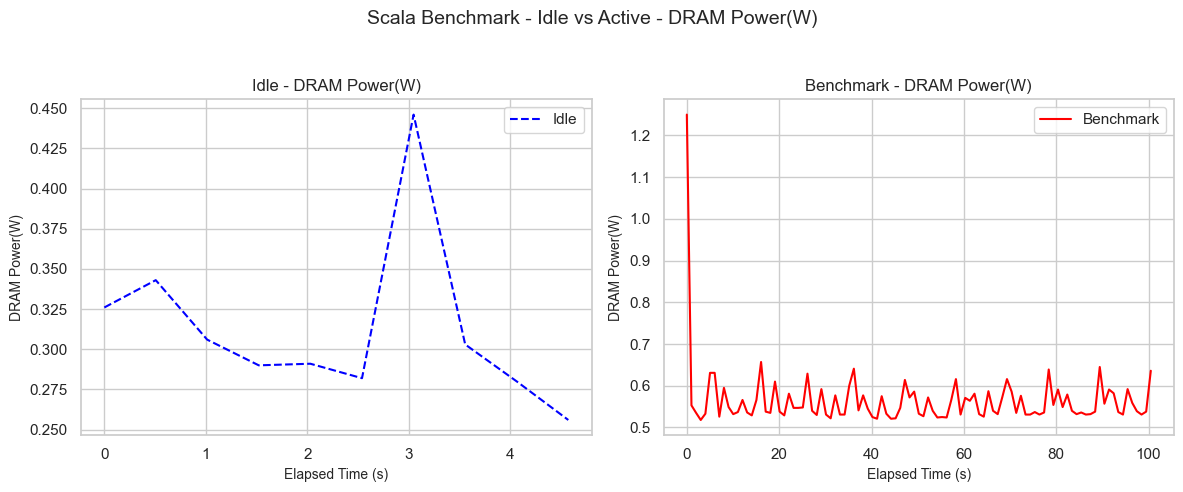

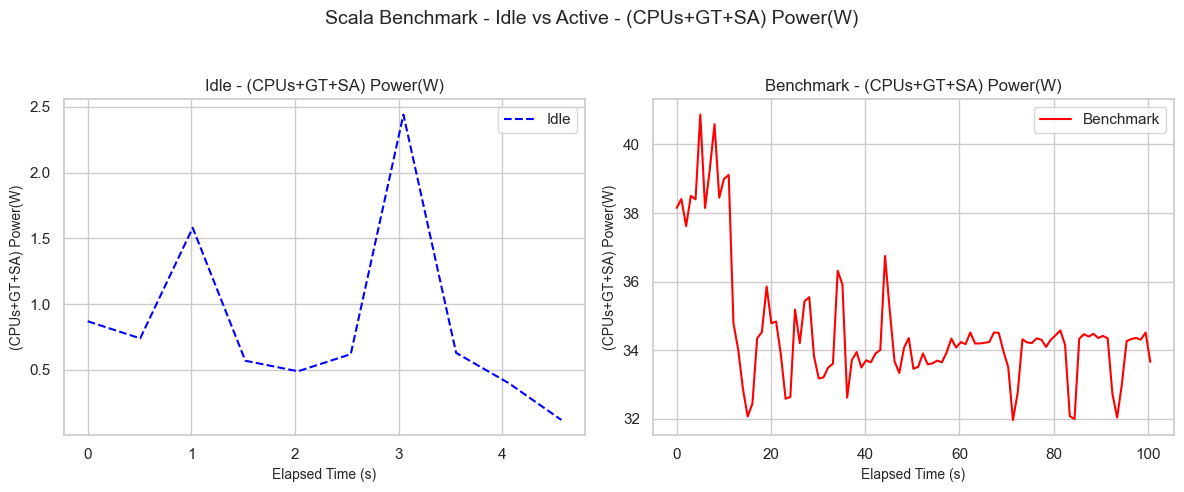

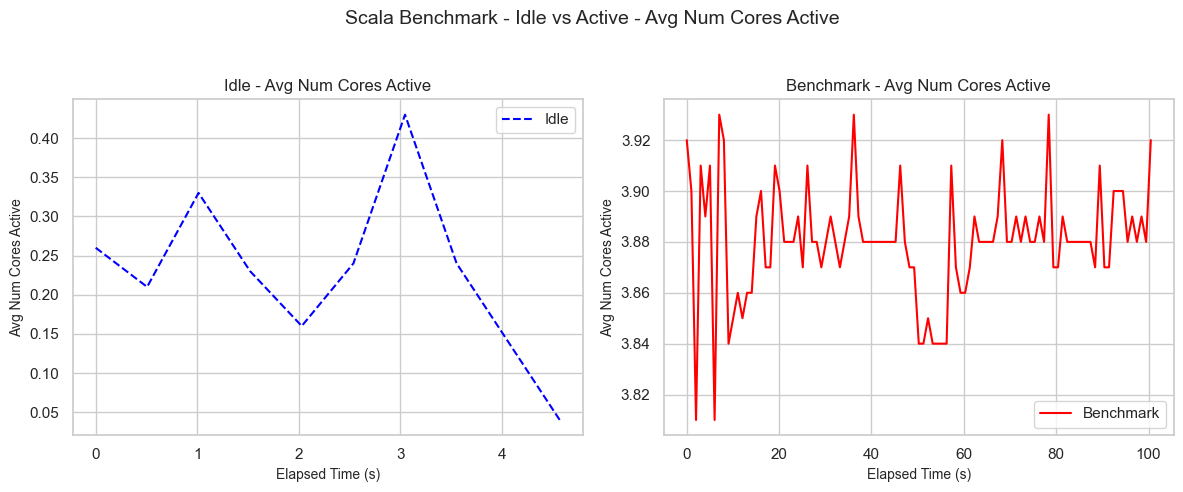

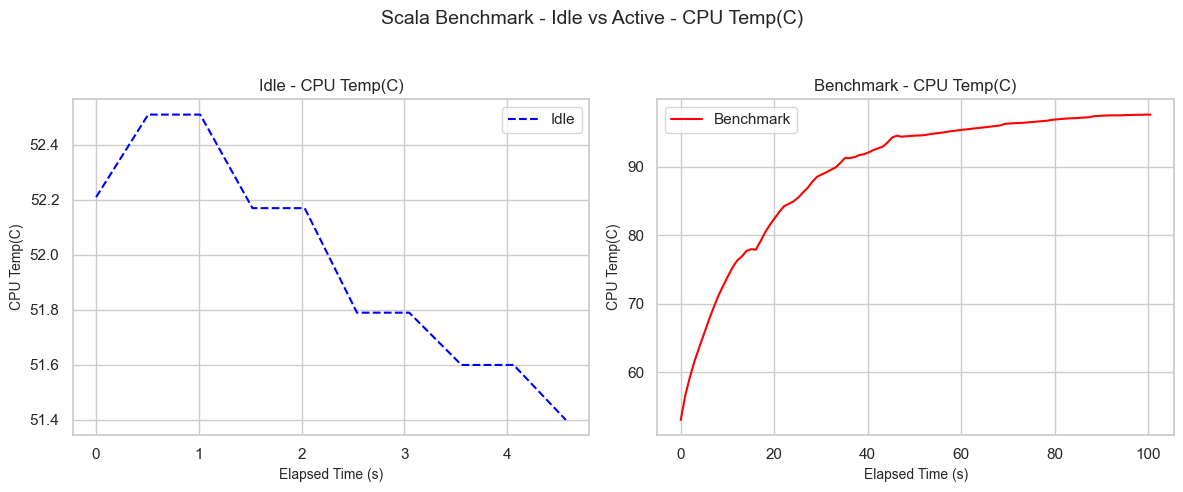

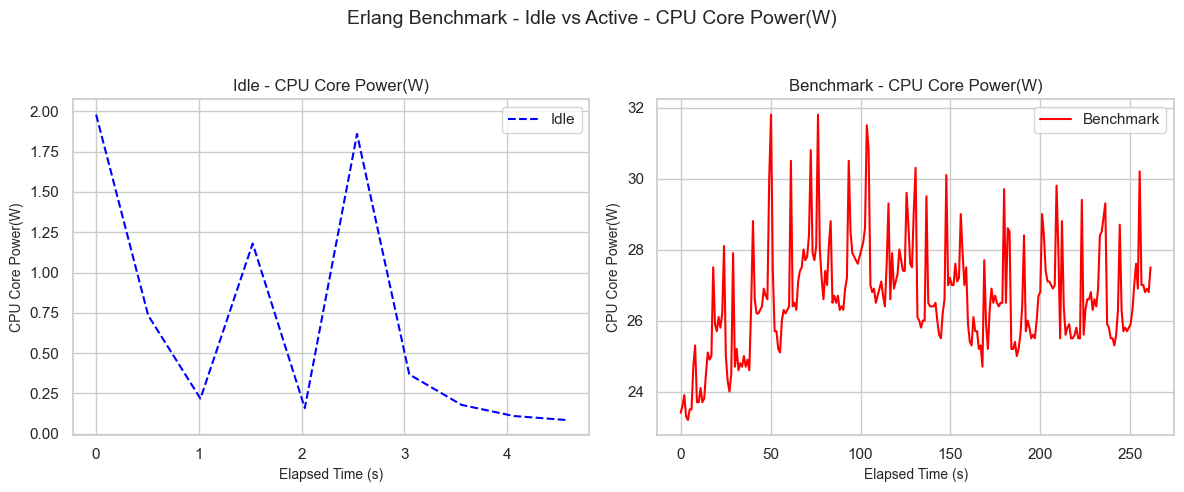

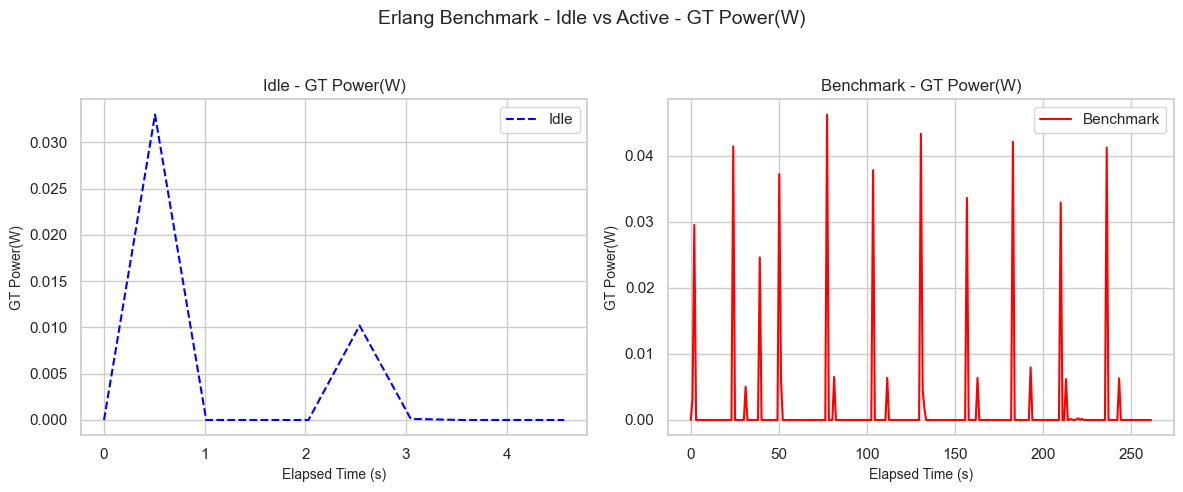

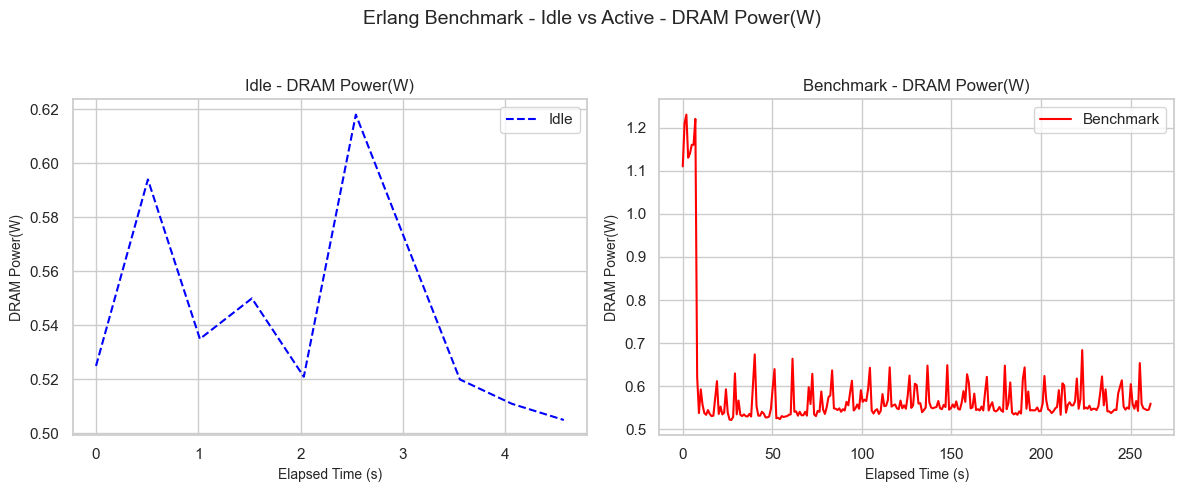

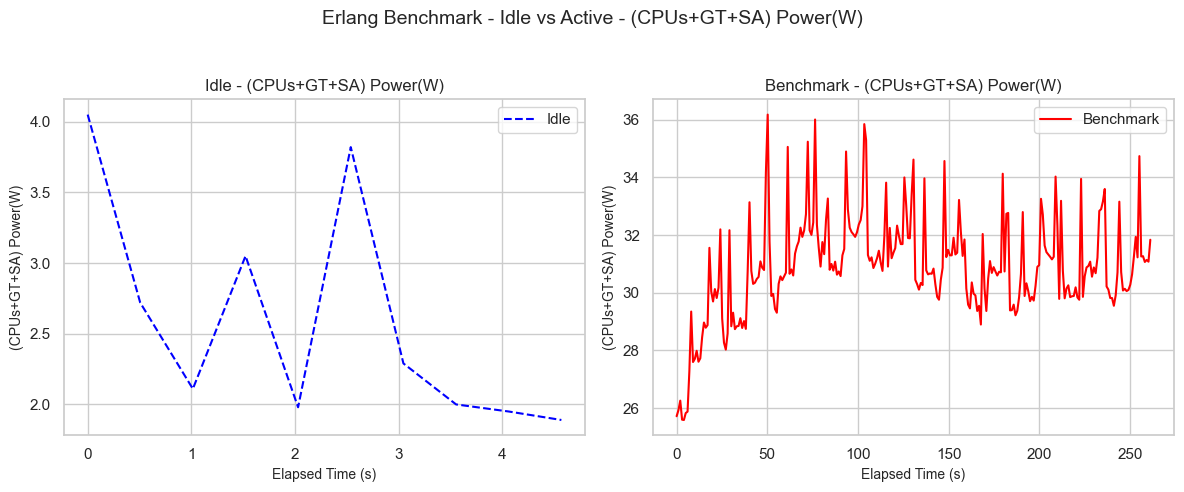

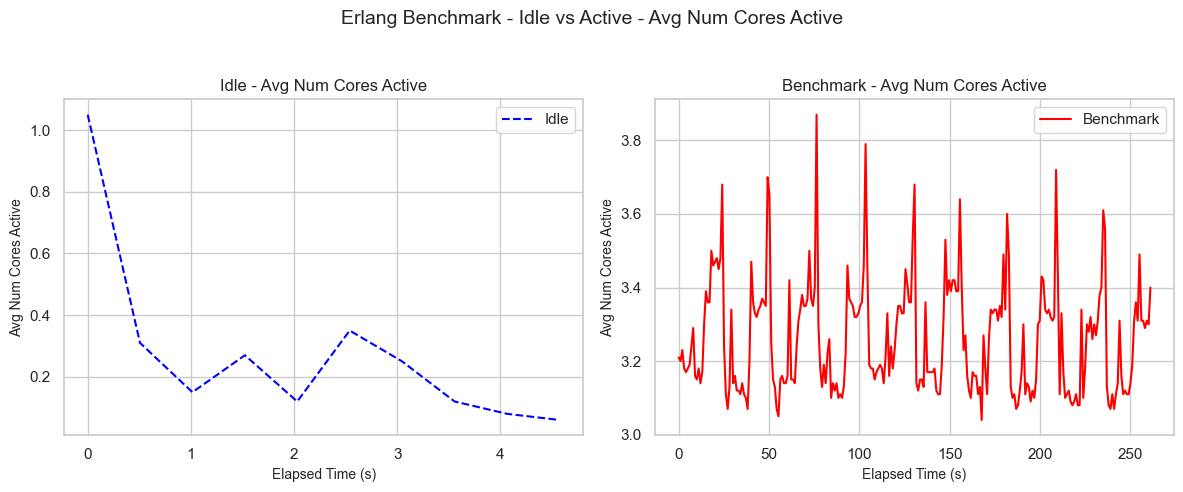

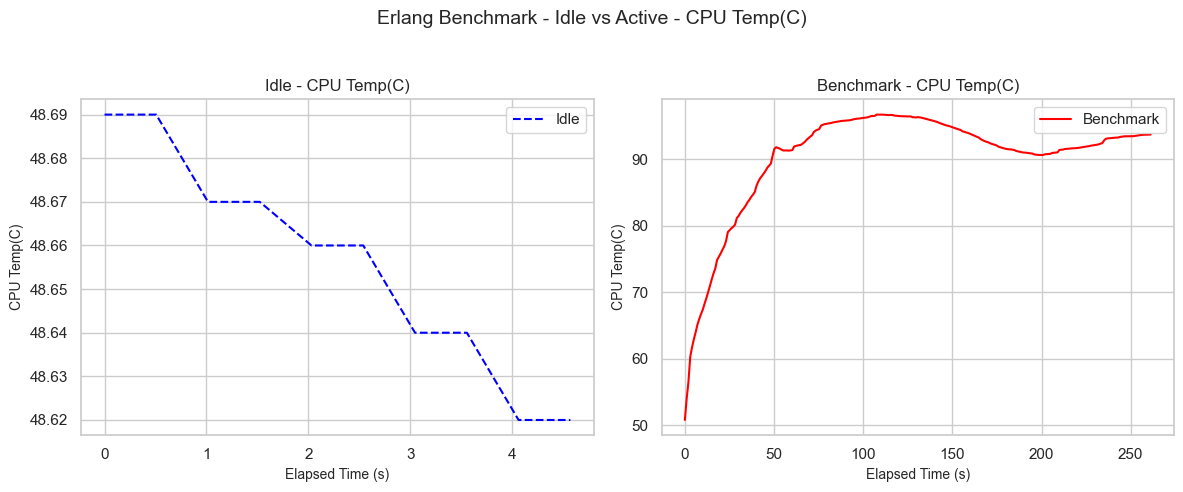

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

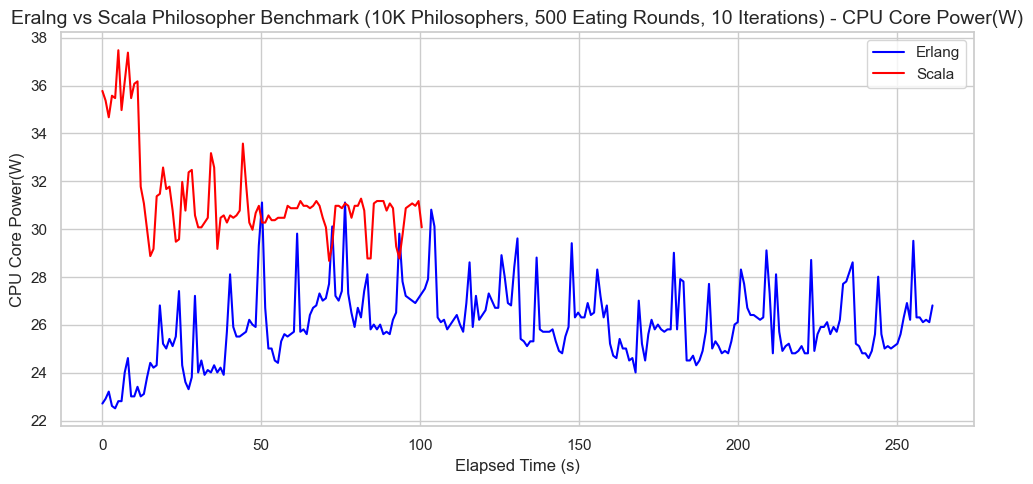

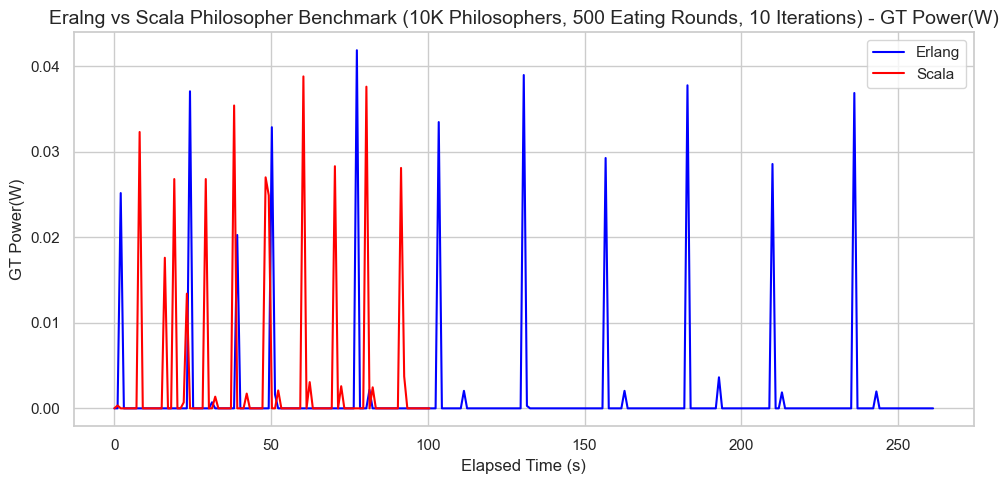

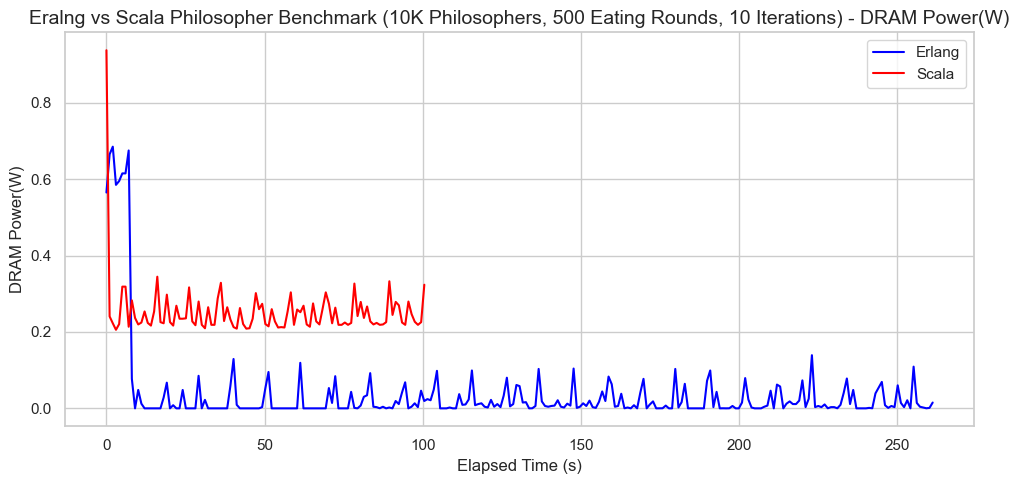

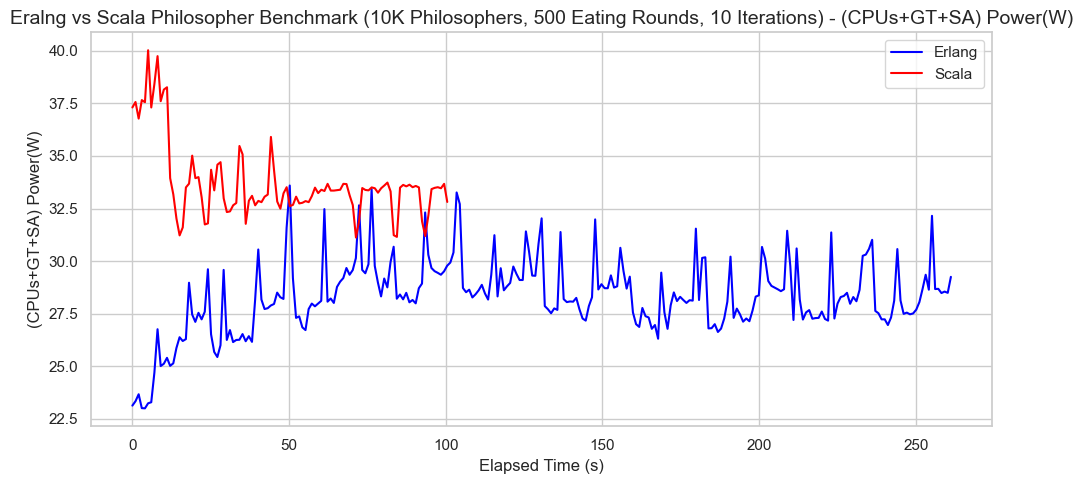

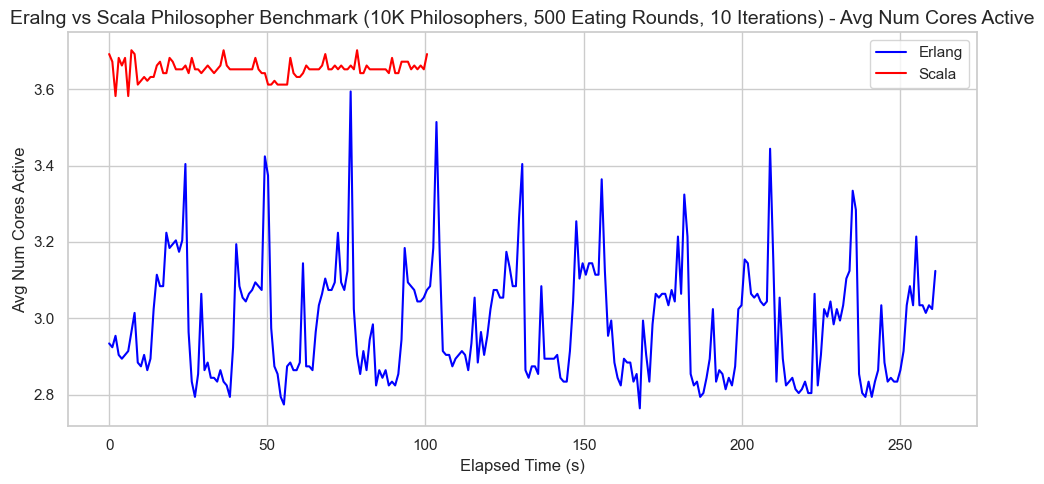

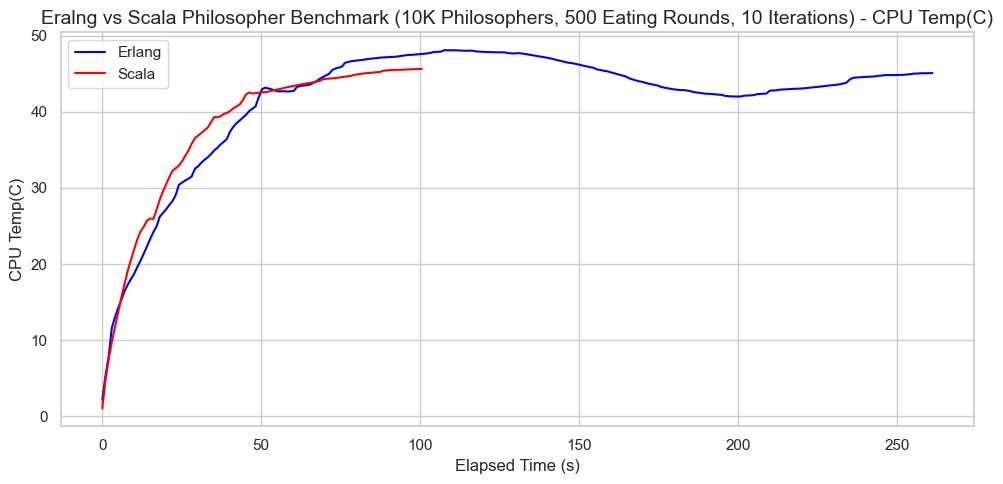

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        31.337046
GT Power(W)               0.000547
DRAM Power(W)             0.252274
(CPUs+GT+SA) Power(W)    33.733901
CPU Temp(C)              37.418465
Avg Num Cores Active      3.652297
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        25.990831
GT Power(W)              -0.002528
DRAM Power(W)             0.034300
(CPUs+GT+SA) Power(W)    28.298828
CPU Temp(C)              41.703962
Avg Num Cores Active      2.984996
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/philosopher/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 3423.9423736776234 Joules
Erlang Benchmark: 7420.102010913103 Joules
